In [1]:
import pandas as pd

# 데이터 불러오기
file_path =  r"C:\Users\james\DATA_LAB\KTX_Forecasting\data\ktx_finalfinal_data.xlsx"
data = pd.read_excel(file_path)

# 데이터 확인
data.head()


,주운행선,운행년월,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,1인당수입율,공급대비승차율,운행대비고객이동,공급좌석수,설비좌석수,열차운행횟수,주말수,공휴일수,명절수,평일수,CPI예상치부합여부
0,경부선,2015-01,69372,3543395,128049178500,3667299,9748048608,14822262064,32578.928980,1.106285,1.452561,3543359,3565309,4035,14,1,0,17,-0.001
1,경부선,2015-02,63270,3245162,121361834100,3422455,9164774985,13580749259,32888.667166,1.146562,1.411851,3245150,3253174,3700,12,3,3,16,-0.003
2,경부선,2015-03,68492,3508931,120948542600,3564537,9121807852,14672499958,31413.120817,1.116383,1.502353,3508927,3518689,3999,13,1,0,18,0.000
3,경부선,2015-04,66146,3397973,120613879800,3524286,9096455922,14101296781,33308.274918,1.100414,1.599228,3397957,3409204,3810,12,0,0,18,0.000
4,경부선,2015-05,69858,3592956,135075256500,3894364,10271657217,14924842491,33934.127954,1.134888,1.505875,3592912,3599102,4022,15,2,0,16,0.000


In [2]:
# '승차인원수' 변수 생성(T0, T1, T2, T3, T4, T5)
data['T0'] = data['승차인원수'].shift(0)
data['T1'] = data['승차인원수'].shift(-1)
data['T2'] = data['승차인원수'].shift(-2)
data['T3'] = data['승차인원수'].shift(-3)
data['T4'] = data['승차인원수'].shift(-4)
data['T5'] = data['승차인원수'].shift(-5)

# Nan값 가진 행 드랍
transformed_data = data.dropna(subset=['T0', 'T1', 'T2', 'T3', 'T4', 'T5'])

# 모델링 데이터 생성
model_data = transformed_data[['T0', 'T1', 'T2', 'T3', 'T4', 'T5']]

# 모델링 데이터 확인
model_data.head()


,T0,T1,T2,T3,T4,T5
0,3667299,3422455.0,3564537.0,3524286.0,3894364.0,2553850.0
1,3422455,3564537.0,3524286.0,3894364.0,2553850.0,3266393.0
2,3564537,3524286.0,3894364.0,2553850.0,3266393.0,3554036.0
3,3524286,3894364.0,2553850.0,3266393.0,3554036.0,3386469.0
4,3894364,2553850.0,3266393.0,3554036.0,3386469.0,3700379.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 훈련 세트, 테스트 세트 생성
x = model_data[['T0', 'T1', 'T2', 'T3', 'T4']]
y = model_data['T5']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

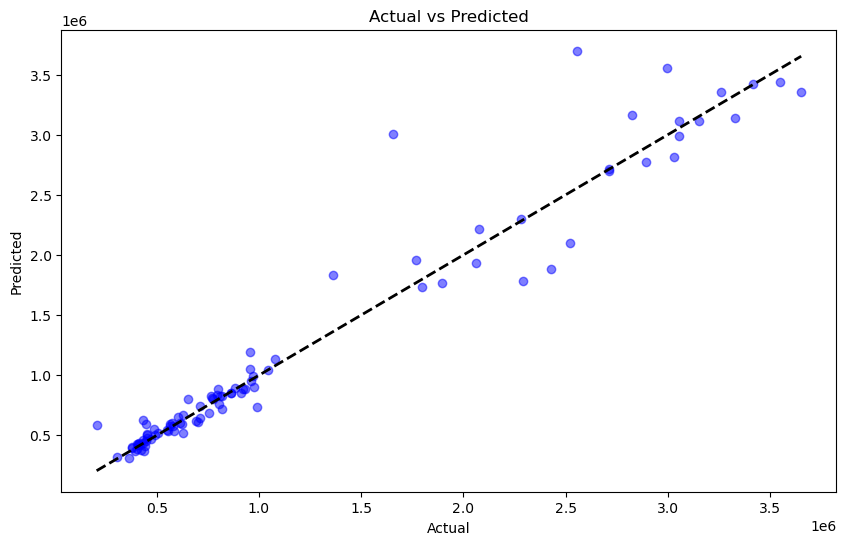

56168097577.046005

In [4]:
##선형 회귀 분석
# 선형 회귀 모델 생성 및 훈련 
li = LinearRegression()
li.fit(x_train, y_train)

# 예측 수행 및 MSE 계산
y_pred_linear = li.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# 선형 회귀 모델 시각화(실제값, 예측값 비교)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 선형 회귀 모델의 MSE 출력
mse_linear

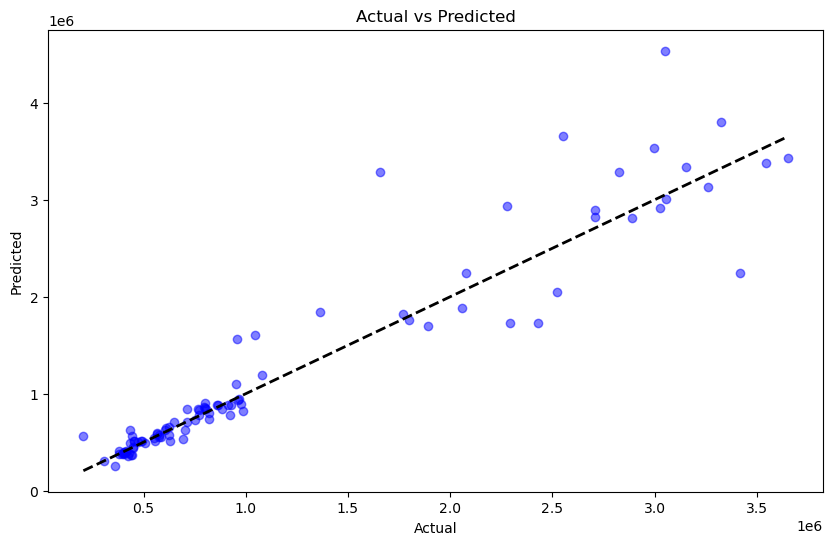

119765061864.32773

In [5]:
from sklearn.ensemble import RandomForestRegressor

## 랜덤 포레스트
# 랜덤 포레스트 모델 생성 및 훈련
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train, y_train)

# 예측 수행 및 MSE 계산
y_pred_rf = rf_reg.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 랜덤 포레스트 모델 시각화(실제값, 예측값 비교)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
mse_rf

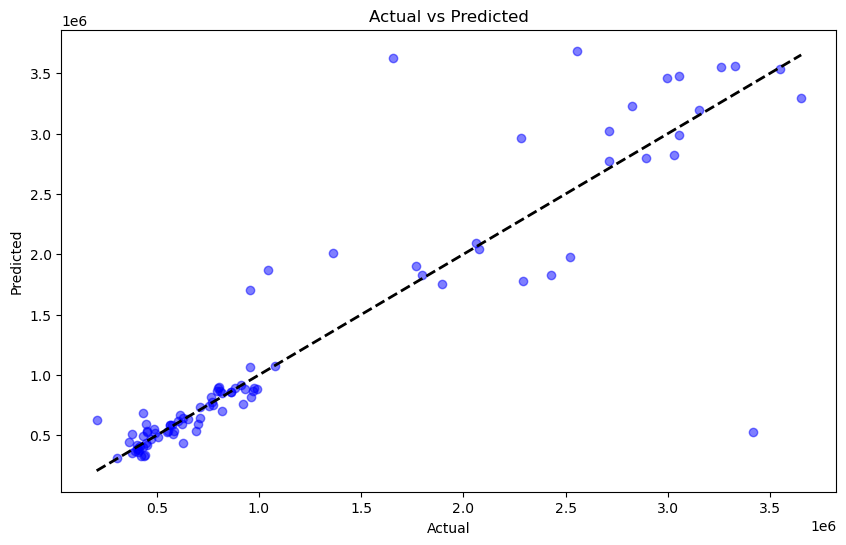

193181735054.4719

In [6]:
from xgboost import XGBRegressor

## XGBoostRegressor 
# XGBoostRegressor 모델 생성 및 훈련
xgb_reg = XGBRegressor(random_state=42, n_estimators=100)
xgb_reg.fit(x_train, y_train)

# 예측 수행 및 MSE 계산
y_pred_xgb = xgb_reg.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# XGBoostRegressor 시각화(실제값, 예측값 비교)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
mse_xgb